In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from find_eyes import find_eyes
import pandas as pd

In [57]:
#COMPUTE ACCURACY FOR PY-FEAT METHOD
df = pd.read_csv("pyfeat_results.csv")
# df = pd.DataFrame.from_dict({'images': ['happy.png', 'sad.png', 'normal.png'], 'pyfeat': ['happiness', 'surprise', 'neutral']})
df["accurate"] = 0
df

,Filename,Max Emotion,accurate
0,subject02_happy.png,happiness,0
1,subject04_sad.png,neutral,0
2,subject02_sad.png,anger,0
3,subject01_normal.png,neutral,0
4,subject03_sad.png,disgust,0
5,subject04_normal.png,neutral,0
6,subject02_normal.png,happiness,0
7,subject03_happy.png,happiness,0
8,subject01_sad.png,disgust,0
9,subject04_happy.png,happiness,0


In [58]:
for row in range(len(df)):
    emotion = df.loc[row, 'Max Emotion']
    name = df.loc[row, 'Filename']
    if ('happiness' in emotion) and ('happy' in name):
         df.loc[row, 'accurate'] = 1
    if ('sadness' in emotion) and ('sad' in name):
         df.loc[row, 'accurate'] = 1
    if ('neutral' in emotion) and ('normal' in name):
         df.loc[row, 'accurate'] = 1

In [59]:
df

,Filename,Max Emotion,accurate
0,subject02_happy.png,happiness,1
1,subject04_sad.png,neutral,0
2,subject02_sad.png,anger,0
3,subject01_normal.png,neutral,1
4,subject03_sad.png,disgust,0
5,subject04_normal.png,neutral,1
6,subject02_normal.png,happiness,0
7,subject03_happy.png,happiness,1
8,subject01_sad.png,disgust,0
9,subject04_happy.png,happiness,1


In [60]:
happy_df = df[df['Filename'].str.contains("happy")]
sad_df = df[df['Filename'].str.contains("sad")]
normal_df = df[df['Filename'].str.contains("normal")]

In [61]:
happy_accuracy = sum(happy_df['accurate']) / len(happy_df['accurate'])
sad_accuracy = sum(sad_df['accurate']) / len(sad_df['accurate'])
normal_accuracy = sum(normal_df['accurate']) / len(normal_df['accurate'])
print(happy_accuracy)
print(sad_accuracy)
print(normal_accuracy)



pyfeat_accuracy = sum(df['accurate']) / len(df['accurate'])

1.0
0.13333333333333333
0.6666666666666666


In [62]:
pyfeat_accuracy

0.6

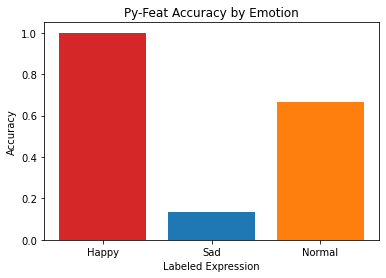

In [63]:
fig, ax = plt.subplots()

names = ['Happy', 'Sad', 'Normal']
counts = [happy_accuracy, sad_accuracy, normal_accuracy]
bar_colors = ['tab:red', 'tab:blue','tab:orange']

ax.bar(names, counts, label=names, color=bar_colors)

ax.set_ylabel('Accuracy')

ax.set_xlabel('Labeled Expression')
ax.set_title('Py-Feat Accuracy by Emotion')

plt.show()

In [75]:
# SAME THING BUT WITH OUR NEW METHOD
# df = pd.DataFrame.from_dict({'images': ['happy.png', 'sad.png', 'normal.png'], 'emotion': ['happiness', 'surprise', 'neutral']})
df = pd.read_csv("new_results.csv")
df["accurate"] = 0
df

,Unnamed: 0,images,emotions,accurate
0,0,subject01_happy_cropped.png,neutral,0
1,1,subject02_happy_cropped.png,sadness,0
2,2,subject03_happy_cropped.png,happiness,0
3,3,subject07_happy_cropped.png,sadness,0
4,4,subject08_happy_cropped.png,happiness,0
5,5,subject09_happy_cropped.png,happiness,0
6,6,subject12_happy_cropped.png,happiness,0
7,7,subject13_happy_cropped.png,neutral,0
8,8,subject01_sad_cropped.png,sadness,0
9,9,subject02_sad_cropped.png,sadness,0


In [76]:
for row in range(len(df)):
    emotion = df.loc[row, 'emotions']
    name = df.loc[row, 'images']
    if ('happiness' in emotion) and ('happy' in name):
         df.loc[row, 'accurate'] = 1
    if ('sadness' in emotion) and ('sad' in name):
         df.loc[row, 'accurate'] = 1
    if ('neutral' in emotion) and ('normal' in name):
         df.loc[row, 'accurate'] = 1

In [77]:
df

,Unnamed: 0,images,emotions,accurate
0,0,subject01_happy_cropped.png,neutral,0
1,1,subject02_happy_cropped.png,sadness,0
2,2,subject03_happy_cropped.png,happiness,1
3,3,subject07_happy_cropped.png,sadness,0
4,4,subject08_happy_cropped.png,happiness,1
5,5,subject09_happy_cropped.png,happiness,1
6,6,subject12_happy_cropped.png,happiness,1
7,7,subject13_happy_cropped.png,neutral,0
8,8,subject01_sad_cropped.png,sadness,1
9,9,subject02_sad_cropped.png,sadness,1


In [78]:
happy_df = df[df['images'].str.contains("happy")]
sad_df = df[df['images'].str.contains("sad")]
normal_df = df[df['images'].str.contains("normal")]

In [79]:
happy_accuracy = sum(happy_df['accurate']) / len(happy_df['accurate'])
sad_accuracy = sum(sad_df['accurate']) / len(sad_df['accurate'])
normal_accuracy = sum(normal_df['accurate']) / len(normal_df['accurate'])
print(happy_accuracy)
print(sad_accuracy)
print(normal_accuracy)
new_accuracy = sum(df['accurate']) / len(df['accurate'])

0.5
0.6
0.3


In [80]:
new_accuracy

0.4642857142857143

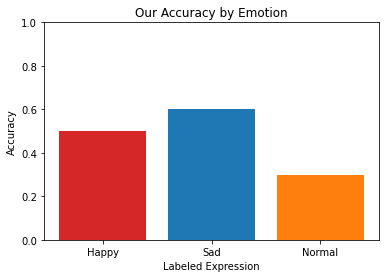

In [81]:
fig, ax = plt.subplots()

names = ['Happy', 'Sad', 'Normal']
counts = [happy_accuracy, sad_accuracy, normal_accuracy]
bar_colors = ['tab:red', 'tab:blue','tab:orange']

ax.bar(names, counts, label=names, color=bar_colors)

ax.set_ylabel('Accuracy')

ax.set_xlabel('Labeled Expression')
ax.set_ylim([0, 1])
ax.set_title('Our Accuracy by Emotion')

plt.show()

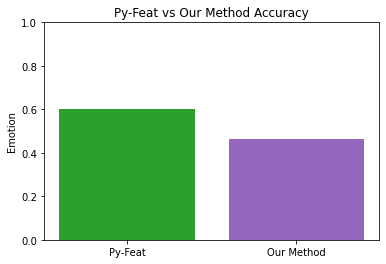

In [85]:
# Overall Accuracy Comparison

fig, ax = plt.subplots()

names = ['Py-Feat', 'Our Method']
counts = [pyfeat_accuracy, new_accuracy]
bar_colors = ['tab:green', 'tab:purple']

ax.bar(names, counts, label=names, color=bar_colors)

ax.set_ylabel('Emotion')
ax.set_title('Py-Feat vs Our Method Accuracy')
ax.set_ylim([0, 1])

plt.show()